In [12]:
#gerekli kütüphaneleri içe aktarıyoruz. 
# pandas veri manipülasyonu için, 
# matplotlib grafik çizimi için, 
# numpy sayısal işlemler için ve 
# sklearn (Scikit-learn) ise makine öğrenimi algoritmaları için kullanılır.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

#Veri setini heart.csv dosyasından pandas kütüphanesinin  fonksiyonuyla okuyoruz 
# ve başlangıçta veri setinin ilk beş satırını görüntülüyoruz.
data=pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
4,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


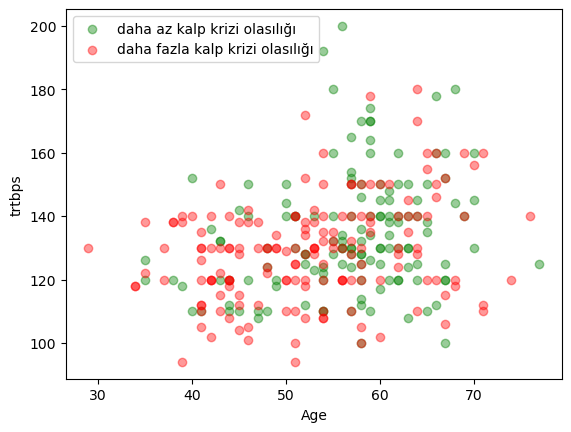

In [2]:
#Veri setindeki hastalıklı ve sağlıklı insanları ayırmak için output sütununu kullanarak iki ayrı alt veri kümesi oluşturuyoruz.
kalp_hastalari = data[data.output == 1]
saglikli_insanlar = data[data.output == 0]
# Sadece gloucose'a bakarak örnek bir çizim 
plt.scatter(saglikli_insanlar.age, saglikli_insanlar.trtbps, color="green", label="daha az kalp krizi olasılığı", alpha = 0.4)
plt.scatter(kalp_hastalari.age, kalp_hastalari.trtbps, color="red", label="daha fazla kalp krizi olasılığı", alpha = 0.4)
plt.xlabel("Age")
plt.ylabel("trtbps")
plt.legend()
plt.show()


In [5]:
# x ve y eksenlerini belirleyelim
#output sütununu bağımlı değişken olarak kabul ediyoruz ve diğer tüm sütunları bağımsız değişkenler olarak alıyoruz.
y = data.output.values
x_ham_veri = data.drop(["output"],axis=1)   

# Verileri normalize ediyoruz.- x_ham_veri içerisindeki değerleri sadece 0 ve 1 arasında olacak şekilde hepsini güncelliyoruz
# Eğer bu şekilde normalization yapmazsak yüksek rakamlar küçük rakamları ezer ve KNN algoritmasını yanıltabilir!
# Normalizasyon, verilerin farklı ölçeklerde olmasını önler ve böylece algoritmanın daha iyi performans göstermesini sağlar.
x = (x_ham_veri - np.min(x_ham_veri))/(np.max(x_ham_veri)-np.min(x_ham_veri))

# önce
print("Normalization öncesi ham veriler:\n")
print(x_ham_veri.head())


# sonra 
print("\n\n\nNormalization sonrası yapay zekaya eğitim için vereceğimiz veriler:\n")
print(x.head())

Normalization öncesi ham veriler:

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   67    1   0     160   286    0        0       108     1      1.5    1   
2   37    1   2     130   250    0        1       187     0      3.5    0   
3   67    1   0     120   229    0        0       129     1      2.6    1   
4   41    0   1     130   204    0        0       172     0      1.4    2   

   caa  thall  
0    0      1  
1    3      2  
2    0      2  
3    2      3  
4    0      2  



Normalization sonrası yapay zekaya eğitim için vereceğimiz veriler:

        age  sex        cp    trtbps      chol  fbs  restecg  thalachh  exng  \
0  0.708333  1.0  1.000000  0.481132  0.244292  1.0      0.0  0.603053   0.0   
1  0.791667  1.0  0.000000  0.622642  0.365297  0.0      0.0  0.282443   1.0   
2  0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.5  0.885496   0.0   
3  0.791667  1

D:\anaconda\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
D:\anaconda\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
D:\anaconda\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [6]:
# train datamız ile test datamızı ayırıyoruz
# train datamız sistemin sağlıklı insan ile hasta insanı ayırt etmesini öğrenmek için kullanılacak
# test datamız ise bakalım makine öğrenme modelimiz doğru bir şekilde hasta ve sağlıklı insanları ayırt edebiliyor mu diye 
# test etmek için kullanılacak...
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1,random_state=1)

# knn modelimizi oluşturuyoruz.
#knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
#knn.fit(x_train,y_train)
#prediction = knn.predict(x_test)
#print("K=3 için Test verilerimizin doğrulama testi sonucu ", knn.score(x_test, y_test))

K=3 için Test verilerimizin doğrulama testi sonucu  0.8387096774193549


In [7]:
# k kaç olmalı ?
# en iyi k değerini belirleyelim..
#Kullanacağımız K en yakın komşu sayısını belirlemek için bir döngü oluşturuyoruz. 
# Modeli farklı K değerleriyle eğitip doğruluk oranlarını görüntülüyoruz.
sayac = 1
for k in range(1,11):
    knn_yeni = KNeighborsClassifier(n_neighbors = k)
    knn_yeni.fit(x_train,y_train)
    print(sayac, "  ", "Doğruluk oranı: %", knn_yeni.score(x_test,y_test)*100)
    sayac += 1
    

1    Doğruluk oranı: % 80.64516129032258
2    Doğruluk oranı: % 80.64516129032258
3    Doğruluk oranı: % 83.87096774193549
4    Doğruluk oranı: % 83.87096774193549
5    Doğruluk oranı: % 90.32258064516128
6    Doğruluk oranı: % 83.87096774193549
7    Doğruluk oranı: % 90.32258064516128
8    Doğruluk oranı: % 87.09677419354838
9    Doğruluk oranı: % 90.32258064516128
10    Doğruluk oranı: % 87.09677419354838


In [9]:
#Veriyi eğitim ve test setlerine bölmek için train_test_split() fonksiyonunu kullanıyoruz.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1,random_state=1)

#5 komşu kullanarak K-NN algoritmasını eğitiyoruz ve test seti üzerinde doğruluk oranını görüntülüyoruz.
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print("K=5 için Test verilerimizin doğrulama testi sonucu ", knn.score(x_test, y_test))

K=5 için Test verilerimizin doğrulama testi sonucu  0.9032258064516129


In [17]:
#Modeli kullanarak yeni bir hastanın verileri üzerinde tahmin yapılıyor.
# Yeni hastanın verileri normalize edilerek modele veriliyor ve tahmin edilen sonuç görüntüleniyor.
from sklearn.preprocessing import MinMaxScaler
 
#MinMaxScaler, veri normalizasyonu için kullanılan bir dönüştürücüdür. 
sc = MinMaxScaler()
sc.fit_transform(x_ham_veri)
 
new_prediction = knn.predict(sc.transform(np.array([[20,1,2,130,233,0,0,172,0,2.6,1,0,1]])))
new_prediction[0]


D:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


1